epoch: 10, loss = 48104.7617
epoch: 20, loss = 46249.3555
epoch: 30, loss = 44900.6055
epoch: 40, loss = 43919.6562
epoch: 50, loss = 43205.8945
epoch: 60, loss = 42686.3242
epoch: 70, loss = 42307.9805
epoch: 80, loss = 42032.3711
epoch: 90, loss = 41831.5547
epoch: 100, loss = 41685.1836


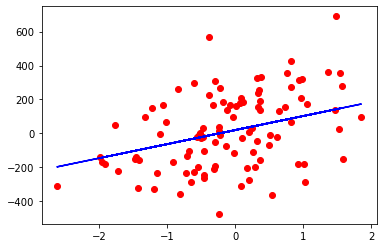

In [1]:
import torch
import torch.nn as nn
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=230, random_state=42)

X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))

# Need to reshape y to have 1 column and n rows
y = y.view(y.shape[0], 1)

n_samples, n_features = X.shape

# Model
input_size = n_features
output_size = n_features
model = nn.Linear(input_size, output_size)

# Loss and optimizer
learning_rate = 0.01
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # forward pass and loss
    y_pred = model(X)
    loss = criterion(y, y_pred)
    
    # backward pass
    loss.backward()
    
    # update
    optimizer.step()
    optimizer.zero_grad()
    
    if (epoch + 1) % 10 == 0:
        print(f'epoch: {epoch + 1}, loss = {loss.item():.4f}')
        
# plot
predicted = model(X).detach()
plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()
